# Plotting Doppler broadened cross sections

Interaction cross sections are affected by the temperature of the target atom. The relative motion of the target can result in the target moving towards or away from the incident particle causing them to collide with different energies.

This python notebook allows users to plot neutron interaction cross sections using OpenMC taking Doppler broadening into account.

First import packages needed for OpenMC and configure the nuclear data path

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import openmc
from openmc.data import REACTION_MT
from pathlib import Path
# Setting the cross section path to the correct location in the docker image.
# If you are running this outside the docker image you will have to change this path to your local cross section path.
openmc.config['cross_sections'] = Path.home() / 'nuclear_data' / 'cross_sections.xml'

This code block plots the total neutron cross section for Tungsten-186 at a single temperature.

Text(0.5, 1.0, 'Total cross section for W186 at 200K')

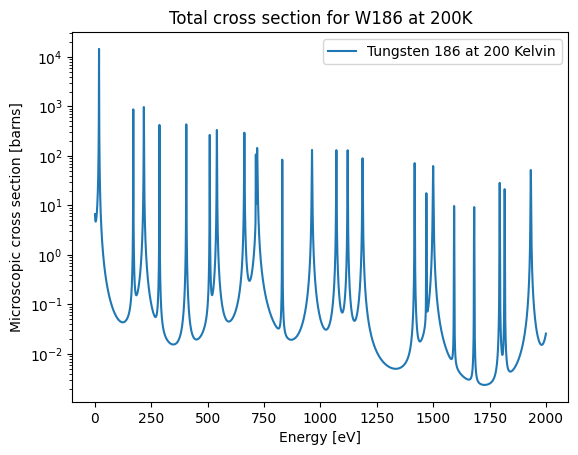

In [2]:
energy = np.linspace(1, 2000, 50000)  # sets the energy range from 1 to 2000eV, this is were resonances are

mt_number = REACTION_MT["(n,total)"]  # looks up the MT number for the total reaction

h5_file = Path.home() / "nuclear_data" / "WMP_Library" / "074186.h5"  # 074186 is W186

isotope_multipole = openmc.data.WindowedMultipole.from_hdf5(h5_file)  # loads up the WMP cross section file

temperature = 200  # temperature in kelvin to plot

fig, ax = plt.subplots()

ax.plot(
    energy,
    isotope_multipole(energy, temperature)[mt_number],
    label=f"Tungsten 186 at {temperature} Kelvin"
)

ax.set_yscale('log')
ax.set_ylabel('Microscopic cross section [barns]')
ax.set_xlabel('Energy [eV]')
ax.legend()
ax.set_title('Total cross section for W186 at 200K')

Zoom in on one of the spectral peaks to observe how increasing temperature causes Doppler broadening.

The next code block plots the total neutron cross section for Iron-56 at 2 different temperatures for a specified energy range that captures a particular resonance. Doppler broadening of the resonance peak should be observed.

Text(0.5, 1.0, 'Total cross section for Fe56 at 300K and 1000K')

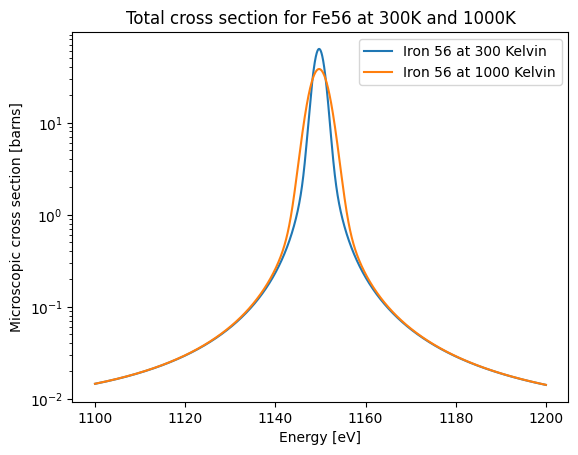

In [3]:
energy = np.linspace(1100, 1200, 50000)  # sets the energy range from 1 to 2000eV, this is were a single resonance is

mt_number = REACTION_MT["(n,total)"]  # looks up the MT number for the total reaction

h5_file = Path.home() / "nuclear_data" / "WMP_Library" / "026056.h5"  # 026056 is Fe56

isotope_multipole = openmc.data.WindowedMultipole.from_hdf5(h5_file)  # loads up the WMP cross section file

fig, ax = plt.subplots()

for temperature in [300, 1000]:   # temperatures in kelvin to plot

    ax.plot(
        energy,
        isotope_multipole(energy, temperature)[mt_number],
        label=f"Iron 56 at {temperature} Kelvin"
    )

ax.set_yscale('log')
ax.set_ylabel('Microscopic cross section [barns]')
ax.set_xlabel('Energy [eV]')
ax.legend()
ax.set_title('Total cross section for Fe56 at 300K and 1000K')

**Learning Outcomes from Part 4:**
- The relative motion of colliding nuclei causes Doppler broadening of interaction cross sections.